In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, Adadelta
#from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import cv2
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
import pickle

data_path = '/content/drive/MyDrive/Belgeler'

Xfile = open(data_path + "/X.pickle", "rb")
yfile = open(data_path + "/y.pickle", "rb")

X = pickle.load(Xfile)
y = pickle.load(yfile)

In [ ]:
X_test_file = open(data_path + "/X_test.pickle", "rb")
y_test_file = open(data_path + "/y_test.pickle", "rb")

X_test = pickle.load(X_test_file)
y_test = pickle.load(y_test_file)

In [ ]:
print(" y shape " + str(y.shape) + " X shape " + str(X.shape) + " y type " + str(type(y)) + " X type " + str(type(X)))

 y shape (28709,) X shape (28709, 48, 48, 1) y type <class 'numpy.ndarray'> X type <class 'numpy.ndarray'>


In [ ]:
from tensorflow.python.keras import regularizers
X = X/255.0
model = Sequential()
model.add(Conv2D(64, (3,3), strides=2, padding="same", activation="relu", kernel_regularizer=regularizers.l2(l=0.01), input_shape=(48, 48, 1)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding="same"))
model.add(Conv2D(128, (3,3), strides=2, padding="same", activation="relu", kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding="same"))

In [ ]:
model.add(Conv2D(256, (3,3), strides=2, padding="same", activation="relu", kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding="same"))
model.add(Conv2D(512, (3,3), strides=2, padding="same", activation="relu", kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding="same"))
model.add(Flatten())

In [ ]:
model.add(Dense(units=128, activation="relu")) #128 #4096 #2048 #1024
model.add(Dropout(0.5))
#model.add(BatchNormalization()) #yeni
model.add(Dense(units=64, activation="relu")) #64 #4096 #2048 #1024
#model.add(Dropout(0.5)) #yeni
#model.add(BatchNormalization()) #yeni
model.add(Dense(units=7, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        640       
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)         0

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"]) #adam yerine adadelta kullan 0.001

In [ ]:
history = model.fit(X, y, batch_size=256, epochs=30, validation_split=0.3) #30 yapmıştım 150 formal aralık 

Epoch 1/30
79/79 [==============================] - 104s 1s/step - loss: 4.5699 - accuracy: 0.2435 - val_loss: 3.5054 - val_accuracy: 0.2473
Epoch 2/30
79/79 [==============================] - 103s 1s/step - loss: 2.9881 - accuracy: 0.3035 - val_loss: 2.7990 - val_accuracy: 0.1736
Epoch 3/30
79/79 [==============================] - 102s 1s/step - loss: 2.3909 - accuracy: 0.3519 - val_loss: 2.5687 - val_accuracy: 0.1736
Epoch 4/30
79/79 [==============================] - 104s 1s/step - loss: 2.1144 - accuracy: 0.3854 - val_loss: 2.3092 - val_accuracy: 0.2656
Epoch 5/30
79/79 [==============================] - 103s 1s/step - loss: 1.9623 - accuracy: 0.4027 - val_loss: 2.2694 - val_accuracy: 0.1762
Epoch 6/30
79/79 [==============================] - 102s 1s/step - loss: 1.8740 - accuracy: 0.4143 - val_loss: 2.1955 - val_accuracy: 0.3276
Epoch 7/30
79/79 [==============================] - 102s 1s/step - loss: 1.8392 - accuracy: 0.4310 - val_loss: 2.1551 - val_accuracy: 0.3328
Epoch 8/30
79

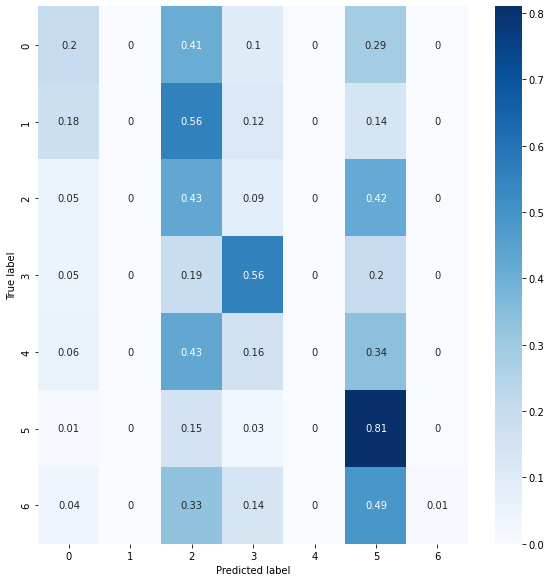

In [ ]:
y_predict=model.predict(X_test)
y_true=y_test
res = tf.math.confusion_matrix(y_true,y_predict.argmax(axis=1)).numpy()
#This res is a 2D matrix now to print it you need to
class_names = [0, 1, 2, 3, 4, 5, 6]
#plt.plot(res)
#X_test.shape
#y_predict
con_mat_norm = np.around(res.astype('float') / res.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = class_names, 
                     columns = class_names)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

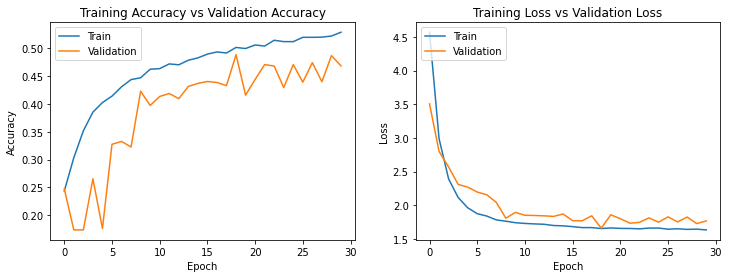

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
model.evaluate(X_test, y_test) #SVM #40

225/225 [==============================] - 4s 17ms/step - loss: 107.4758 - accuracy: 0.3206


[107.47577667236328, 0.32056283950805664]